# Predicting prices of used cars

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import pickle
from IPython.core.display import display, HTML
import dataframe_image as dfi
import warnings
warnings.filterwarnings("ignore")

# Read CSV

## Used car prices in the UK 

#### It comprises 85,555 used car prices in the UK from eight producers - Toyota, Audi, Hyundai, Volkswagen, Mercedes-Benz, BMW.

In [2]:
audi=pd.read_csv('audi.csv')
bmw=pd.read_csv('bmw.csv')
ford=pd.read_csv('ford.csv')
hyundi=pd.read_csv('hyundi.csv')
skoda=pd.read_csv('skoda.csv')
toyota=pd.read_csv('toyota.csv')
volkswagen=pd.read_csv('vw.csv')
merc=pd.read_csv('merc.csv')

In [3]:
#list dataframe you want to append
frame = [audi, bmw, ford, hyundi, skoda,toyota,volkswagen,merc]

#new dataframe to store append result
carprice = pd.DataFrame()

for df in frame:
    carprice = carprice.append(df)

In [4]:
carprice

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145.0,55.4,2.0,NaN
13115,B Class,2020,24699,Automatic,2500,Diesel,145.0,55.4,2.0,NaN
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145.0,41.5,2.1,NaN
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145.0,45.6,2.0,NaN


## Vehicle's CO2 emissions and energy consumption

In [5]:
CO2=pd.read_csv('CO2 Emissions.csv',usecols=['Make','Model','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Engine Size(L)','CO2 Emissions(g/km)'])

In [6]:
CO2

,Make,Model,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,2.0,9.9,6.7,8.5,196
1,ACURA,ILX,2.4,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,1.5,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,3.5,12.7,9.1,11.1,255
4,ACURA,RDX AWD,3.5,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,2.0,10.7,7.7,9.4,219
7381,VOLVO,XC60 T5 AWD,2.0,11.2,8.3,9.9,232
7382,VOLVO,XC60 T6 AWD,2.0,11.7,8.6,10.3,240
7383,VOLVO,XC90 T5 AWD,2.0,11.2,8.3,9.9,232


# Combining the data

#### The two data sets were obtained from different countries and needed to be merged. During this process, some issues arose. One was the linking of model with engine size to create a new column – model-engine size. In some cases, the models were not the same.

In [7]:
CO2['Engine Size(L)']=CO2['Engine Size(L)'].astype(str)

In [8]:
CO2['model_enginesize']=CO2['Model'].astype(str)+'-'+CO2['Engine Size(L)']

In [9]:
CO2

,Make,Model,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),model_enginesize
0,ACURA,ILX,2.0,9.9,6.7,8.5,196,ILX-2.0
1,ACURA,ILX,2.4,11.2,7.7,9.6,221,ILX-2.4
2,ACURA,ILX HYBRID,1.5,6.0,5.8,5.9,136,ILX HYBRID-1.5
3,ACURA,MDX 4WD,3.5,12.7,9.1,11.1,255,MDX 4WD-3.5
4,ACURA,RDX AWD,3.5,12.1,8.7,10.6,244,RDX AWD-3.5
...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,2.0,10.7,7.7,9.4,219,XC40 T5 AWD-2.0
7381,VOLVO,XC60 T5 AWD,2.0,11.2,8.3,9.9,232,XC60 T5 AWD-2.0
7382,VOLVO,XC60 T6 AWD,2.0,11.7,8.6,10.3,240,XC60 T6 AWD-2.0
7383,VOLVO,XC90 T5 AWD,2.0,11.2,8.3,9.9,232,XC90 T5 AWD-2.0


In [10]:
carprice['engineSize']=carprice['engineSize'].astype(str)

In [11]:
carprice['model_enginesize']=carprice['model'].astype(str)+'-'+carprice['engineSize']

In [12]:
carprice['model_enginesize'] = carprice['model_enginesize'].str.replace(' ', '')

In [13]:
carprice

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£),model_enginesize
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,NaN,A1-1.4
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,NaN,A6-2.0
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,NaN,A1-1.4
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,NaN,A4-2.0
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,NaN,A3-1.0
...,...,...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145.0,55.4,2.0,NaN,CClass-2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145.0,55.4,2.0,NaN,BClass-2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145.0,41.5,2.1,NaN,GLCClass-2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145.0,45.6,2.0,NaN,CLSClass-2.0


# Data merging

In [14]:
df=pd.merge(CO2,carprice,how='inner',on='model_enginesize')

In [15]:
df

,Make,Model,Engine Size(L),Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),model_enginesize,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
0,AUDI,A4,2.0,9.9,7.4,8.8,202,A4-2.0,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,NaN
1,AUDI,A4,2.0,9.9,7.4,8.8,202,A4-2.0,A4,2016,11750,Manual,75185,Diesel,20.0,70.6,2.0,NaN
2,AUDI,A4,2.0,9.9,7.4,8.8,202,A4-2.0,A4,2017,18500,Automatic,17418,Diesel,145.0,62.8,2.0,NaN
3,AUDI,A4,2.0,9.9,7.4,8.8,202,A4-2.0,A4,2018,17200,Automatic,25138,Diesel,145.0,70.6,2.0,NaN
4,AUDI,A4,2.0,9.9,7.4,8.8,202,A4-2.0,A4,2017,16000,Manual,29063,Diesel,145.0,70.6,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36340,TOYOTA,Corolla,2.0,8.2,6.5,7.4,173,Corolla-2.0,Corolla,2019,25650,Automatic,4000,Hybrid,135.0,72.4,2.0,NaN
36341,TOYOTA,Corolla,2.0,8.2,6.5,7.4,173,Corolla-2.0,Corolla,2019,22750,Automatic,9000,Hybrid,135.0,72.4,2.0,NaN
36342,TOYOTA,Corolla,2.0,8.2,6.5,7.4,173,Corolla-2.0,Corolla,2019,24495,Automatic,2165,Hybrid,135.0,72.4,2.0,NaN
36343,TOYOTA,Corolla,2.0,8.2,6.5,7.4,173,Corolla-2.0,Corolla,2019,24295,Automatic,6568,Hybrid,135.0,72.4,2.0,NaN


#### Skoda and Mercedes Benz were removed because model_enginesize in the UK and Canada were not the same.

<AxesSubplot:xlabel='Make', ylabel='count'>

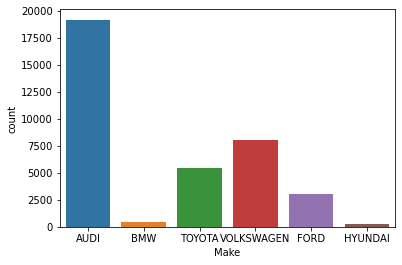

In [16]:
sns.countplot(df["Make"])

# Data Preparation

#### Data exploration

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36345 entries, 0 to 36344
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              36345 non-null  object 
 1   Model                             36345 non-null  object 
 2   Engine Size(L)                    36345 non-null  object 
 3   Fuel Consumption City (L/100 km)  36345 non-null  float64
 4   Fuel Consumption Hwy (L/100 km)   36345 non-null  float64
 5   Fuel Consumption Comb (L/100 km)  36345 non-null  float64
 6   CO2 Emissions(g/km)               36345 non-null  int64  
 7   model_enginesize                  36345 non-null  object 
 8   model                             36345 non-null  object 
 9   year                              36345 non-null  int64  
 10  price                             36345 non-null  int64  
 11  transmission                      36345 non-null  object 
 12  mile

#### Dropping unnecessary columns, rename and make text easier to read.

In [18]:
df=df.drop(columns=['Model','model','Engine Size(L)','engineSize','tax','tax(£)','mpg'])

In [19]:
df = df.rename({"Make":"company"}, axis=1)
df = df.rename({"model_enginesize":"name"}, axis=1)
df = df.rename({"fuelType":"fuel_type"}, axis=1)
df = df.rename({"mileage":"kms_driven"}, axis=1)
df = df.rename({"price":"Price"}, axis=1)

In [20]:
df['name']=df['company'].astype(str)+' '+df['name']

#### The data contained text which was unnecessary and could not be analysed. An example of this is the use of “other”. The transmission category contained Automatic, Semi-auto, Manual and other. The other category was removed so as to avoid inaccurate predictions. Under fuel type, Diesel, Petrol, Hybrid and other were listed. Again, the unspecific “other” category was removed. 

In [21]:
df['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto', 'Other'], dtype=object)

In [22]:
array = ['Automatic','Manual','Semi-Auto']
df=df[df['transmission'].isin(array)]

In [23]:
df['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [24]:
df['fuel_type'].unique()

array(['Diesel', 'Petrol', 'Hybrid', 'Other'], dtype=object)

In [25]:
array = ['Diesel','Petrol','Hybrid']
df=df[df['fuel_type'].isin(array)]

In [26]:
df['fuel_type'].unique()

array(['Diesel', 'Petrol', 'Hybrid'], dtype=object)

# Remove outliers 

#### BMW and Hyundai cars represented 1.12 and 0.74 percent of the total database, respectively. They were removed. 

<AxesSubplot:xlabel='company', ylabel='count'>

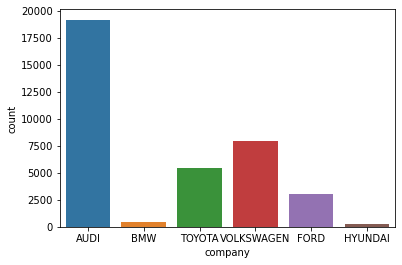

In [27]:
sns.countplot(df["company"])

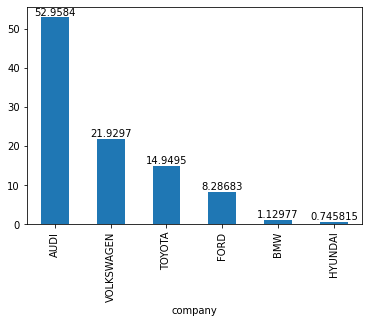

In [28]:
temp_df = (df.groupby('company').size().sort_values(ascending=False) / df.groupby('company').size().sort_values(ascending=False).sum())*100
    
ax = temp_df.plot(kind='bar')
    
ax.bar_label(ax.containers[0])
        
plt.show()

In [29]:
array = ['AUDI','TOYOTA','VOLKSWAGEN','FORD']
df=df[df['company'].isin(array)]

<AxesSubplot:xlabel='company', ylabel='count'>

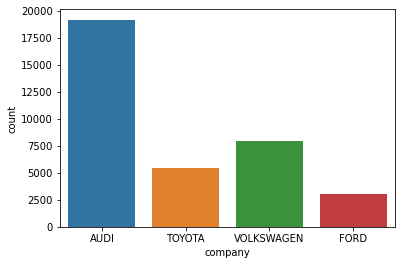

In [30]:
sns.countplot(df["company"])

#### The highest used car price was £145,000, but there was only 0.37% of observations between this figure and £70,000. These were removed to not skew the results. Similarly, upper limit for mileage was adjusted from 176000 km to less than 150000 km because the range of more than 150000 km is only 0.02 percent.


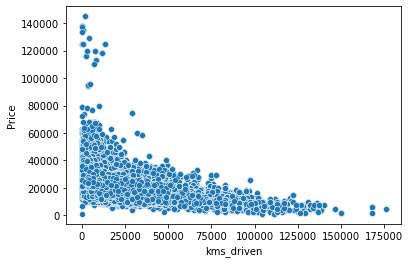

In [31]:
Age_of_Vehicle_Engine_Capacity=sns.scatterplot(data=df, x = 'kms_driven',y = 'Price')

#### The Price range of more than 70000 km is only 0.37 percent.

In [32]:
a = df.loc[df['Price'] > 70000,'Price'].count()/df['Price'].count()
a*100

0.3715902373110379

In [33]:
df['Price'].describe()

count     35523.000000
mean      21671.660586
std       12070.293507
min         899.000000
25%       12995.000000
50%       18946.000000
75%       27950.000000
max      145000.000000
Name: Price, dtype: float64

#### The mileage range of more than 150000 km is only 0.02 percent.

In [34]:
df['kms_driven'].describe()

count     35523.000000
mean      25439.702137
std       23253.213009
min           1.000000
25%        6592.000000
50%       19973.000000
75%       36816.000000
max      176000.000000
Name: kms_driven, dtype: float64

In [35]:
a = df.loc[df['kms_driven'] > 150000,'kms_driven'].count()/df['kms_driven'].count()
a*100

0.028150775553866508

#### Remove outliers

In [36]:
df_cleaned = (df['kms_driven'] <= 150000) 

df = df[df_cleaned]

df['kms_driven']

0        25952
1        75185
2        17418
3        25138
4        29063
         ...  
36340     4000
36341     9000
36342     2165
36343     6568
36344     3568
Name: kms_driven, Length: 35513, dtype: int64

In [37]:
df_cleaned = (df['Price'] <= 70000) 

df = df[df_cleaned]

df['Price']

0        16800
1        11750
2        18500
3        17200
4        16000
         ...  
36340    25650
36341    22750
36342    24495
36343    24295
36344    23250
Name: Price, Length: 35381, dtype: int64

#### In each year between 1998 and 2003, there were less than ten observations. Consequently, 2004 was adopted as the start year

In [38]:
df.groupby("year").count()

,company,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),name,Price,transmission,kms_driven,fuel_type
year,,,,,,,,,,
1998,2,2,2,2,2,2,2,2,2,2
2001,2,2,2,2,2,2,2,2,2,2
2002,2,2,2,2,2,2,2,2,2,2
2003,5,5,5,5,5,5,5,5,5,5
2004,14,14,14,14,14,14,14,14,14,14
2005,14,14,14,14,14,14,14,14,14,14
2006,31,31,31,31,31,31,31,31,31,31
2007,38,38,38,38,38,38,38,38,38,38
2008,77,77,77,77,77,77,77,77,77,77


In [39]:
df_cleaned = (df['year'] >= 2004) 

df = df[df_cleaned]

df['year']

0        2017
1        2016
2        2017
3        2018
4        2017
         ... 
36340    2019
36341    2019
36342    2019
36343    2019
36344    2019
Name: year, Length: 35370, dtype: int64

#### Used car prices in the UK was released in 2020. To find differential such as 2020(data released) - 2020(model year) = 0 years because it is impossible to have 0-year-old cars. It should change from 0 years to less than 1 year.

In [40]:
df['input_data_year'] = 2020
df['year'] = df['input_data_year'] - df['year']
df.drop(['input_data_year'] ,axis=1,inplace=True)

In [41]:
df = df.sort_values(by='year')

In [42]:
dfpearson = df.copy()

In [43]:
df['year'] = df['year'].replace(0, 'less than 1 year')
df['year'] = df['year'].replace(1, '01')
df['year'] = df['year'].replace(2, '02')
df['year'] = df['year'].replace(3, '03')
df['year'] = df['year'].replace(4, '04')
df['year'] = df['year'].replace(5, '05')
df['year'] = df['year'].replace(6, '06')
df['year'] = df['year'].replace(7, '07')
df['year'] = df['year'].replace(8, '08')
df['year'] = df['year'].replace(9, '09')

In [44]:
df['year'] = df['year'].astype(str)

In [45]:
df

,company,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),name,year,Price,transmission,kms_driven,fuel_type
26334,TOYOTA,7.3,5.8,6.6,155,TOYOTA Yaris-1.5,less than 1 year,14990,Automatic,10,Petrol
12340,AUDI,13.8,11.4,12.7,296,AUDI Q7-3.0,less than 1 year,68000,Automatic,4162,Diesel
12341,AUDI,13.8,11.4,12.7,296,AUDI Q7-3.0,less than 1 year,53792,Automatic,3182,Diesel
6788,AUDI,12.0,8.5,10.4,239,AUDI Q5-2.0,less than 1 year,39990,Semi-Auto,6000,Petrol
12503,AUDI,13.2,9.2,11.4,262,AUDI S4-3.0,less than 1 year,45888,Automatic,1500,Diesel
...,...,...,...,...,...,...,...,...,...,...,...
25060,TOYOTA,8.5,6.6,7.6,178,TOYOTA Corolla-1.8,16,1250,Manual,111000,Petrol
29475,VOLKSWAGEN,8.1,6.4,7.4,172,VOLKSWAGEN Golf-1.4,16,1550,Manual,150000,Petrol
24980,TOYOTA,8.3,6.7,7.6,178,TOYOTA Corolla-1.8,16,2095,Manual,96000,Petrol
25334,TOYOTA,8.0,6.0,7.1,165,TOYOTA Corolla-1.8,16,2095,Manual,96000,Petrol


In [46]:
df=df.reset_index()

In [47]:
df=df.drop(columns=['index'])

In [48]:
df

,company,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),name,year,Price,transmission,kms_driven,fuel_type
0,TOYOTA,7.3,5.8,6.6,155,TOYOTA Yaris-1.5,less than 1 year,14990,Automatic,10,Petrol
1,AUDI,13.8,11.4,12.7,296,AUDI Q7-3.0,less than 1 year,68000,Automatic,4162,Diesel
2,AUDI,13.8,11.4,12.7,296,AUDI Q7-3.0,less than 1 year,53792,Automatic,3182,Diesel
3,AUDI,12.0,8.5,10.4,239,AUDI Q5-2.0,less than 1 year,39990,Semi-Auto,6000,Petrol
4,AUDI,13.2,9.2,11.4,262,AUDI S4-3.0,less than 1 year,45888,Automatic,1500,Diesel
...,...,...,...,...,...,...,...,...,...,...,...
35365,TOYOTA,8.5,6.6,7.6,178,TOYOTA Corolla-1.8,16,1250,Manual,111000,Petrol
35366,VOLKSWAGEN,8.1,6.4,7.4,172,VOLKSWAGEN Golf-1.4,16,1550,Manual,150000,Petrol
35367,TOYOTA,8.3,6.7,7.6,178,TOYOTA Corolla-1.8,16,2095,Manual,96000,Petrol
35368,TOYOTA,8.0,6.0,7.1,165,TOYOTA Corolla-1.8,16,2095,Manual,96000,Petrol


# Data analysis

### Number of cars with transmission, fuel type, and company

In [49]:
sns.set(font_scale=2.35)

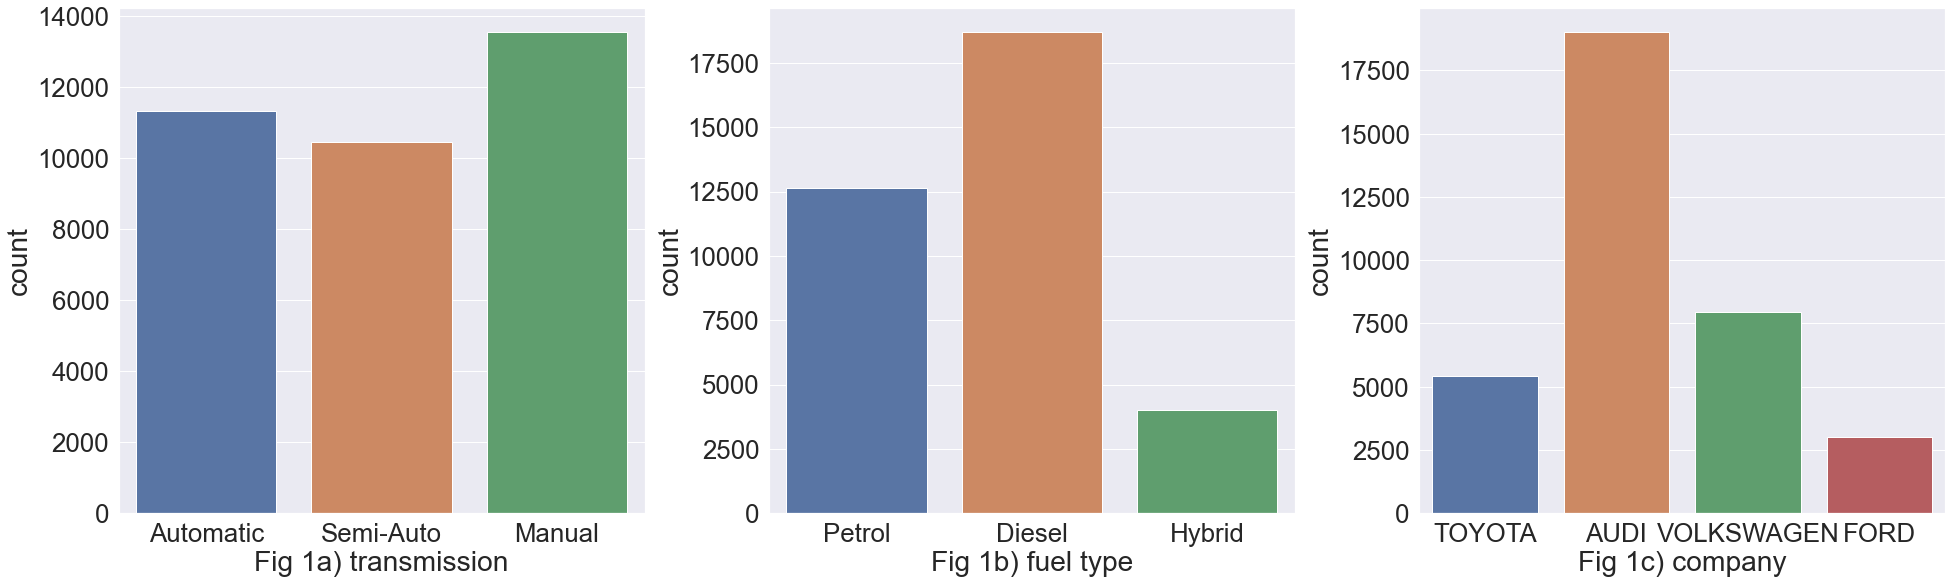

In [50]:
fig, ax =plt.subplots(1,3, figsize=(27, 8), constrained_layout=True)
ax1=sns.countplot(df["transmission"],ax=ax[0])
ax2=sns.countplot(df["fuel_type"],ax=ax[1])
ax3=sns.countplot(df["company"],ax=ax[2])
ax1.set_xlabel('Fig 1a) transmission')
ax2.set_xlabel('Fig 1b) fuel type')
ax3.set_xlabel('Fig 1c) company')
fig.show()
fig.savefig('Number_of_cars.png')

In [51]:
df.groupby("transmission").count()

,company,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),name,year,Price,kms_driven,fuel_type
transmission,,,,,,,,,,
Automatic,11331,11331,11331,11331,11331,11331,11331,11331,11331,11331
Manual,13567,13567,13567,13567,13567,13567,13567,13567,13567,13567
Semi-Auto,10472,10472,10472,10472,10472,10472,10472,10472,10472,10472


In [52]:
df.groupby("fuel_type").count()

,company,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),name,year,Price,transmission,kms_driven
fuel_type,,,,,,,,,,
Diesel,18711,18711,18711,18711,18711,18711,18711,18711,18711,18711
Hybrid,4010,4010,4010,4010,4010,4010,4010,4010,4010,4010
Petrol,12649,12649,12649,12649,12649,12649,12649,12649,12649,12649


In [53]:
df.groupby("company").count()

,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),name,year,Price,transmission,kms_driven,fuel_type
company,,,,,,,,,,
AUDI,19032,19032,19032,19032,19032,19032,19032,19032,19032,19032
FORD,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
TOYOTA,5405,5405,5405,5405,5405,5405,5405,5405,5405,5405
VOLKSWAGEN,7933,7933,7933,7933,7933,7933,7933,7933,7933,7933


### Average prices of transmission, fuel type and company

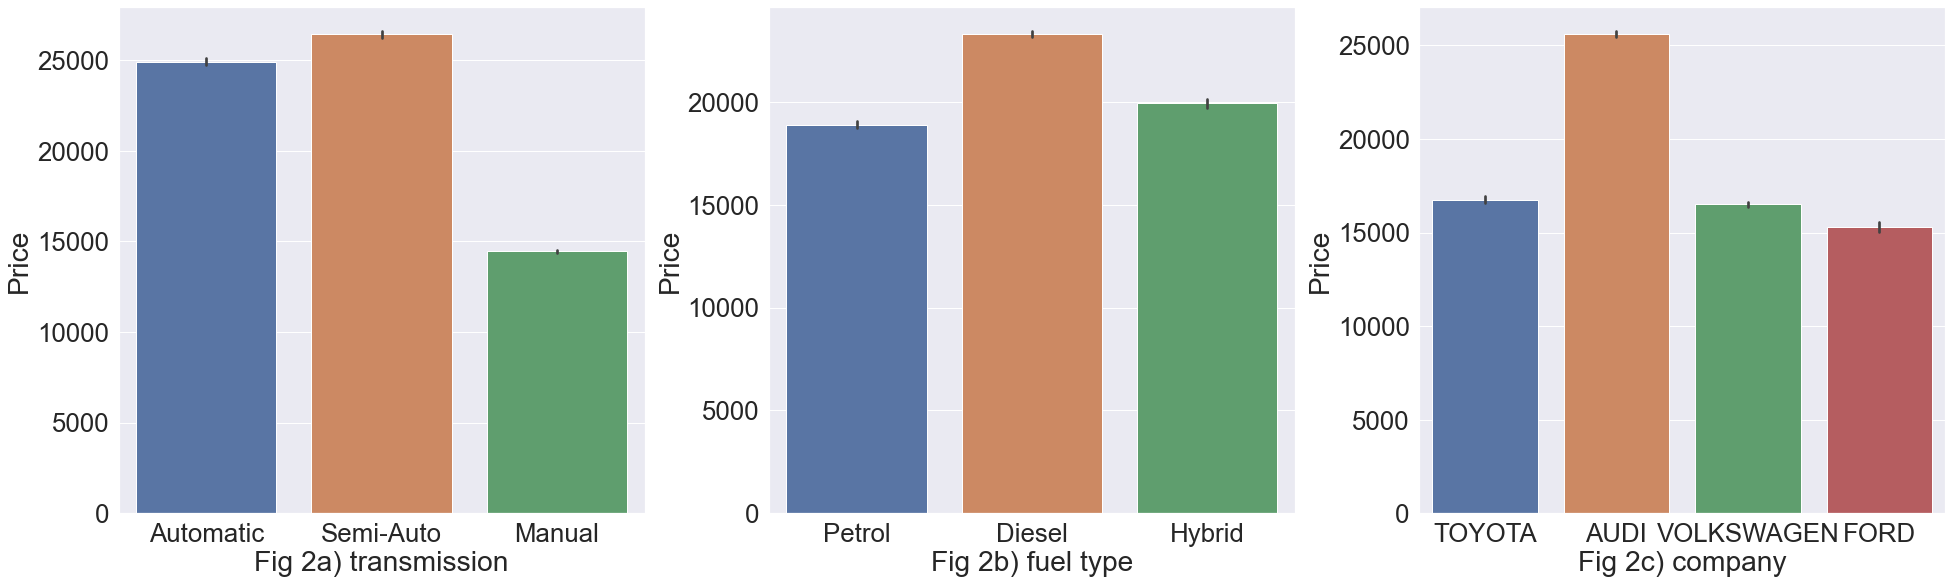

In [54]:
fig, ax =plt.subplots(1,3, figsize=(27, 8), constrained_layout=True)
ax1=sns.barplot(df["transmission"], df["Price"],ax=ax[0])
ax2=sns.barplot(df['fuel_type'], df["Price"],ax=ax[1])
ax3=sns.barplot(df["company"], df["Price"],ax=ax[2])
ax1.set_xlabel('Fig 2a) transmission')
ax2.set_xlabel('Fig 2b) fuel type')
ax3.set_xlabel('Fig 2c) company')
fig.show()
fig.savefig('Average_selling_price.png')

In [55]:
df.groupby('transmission', as_index=False)['Price'].mean().round(2)

,transmission,Price
0,Automatic,24917.67
1,Manual,14443.26
2,Semi-Auto,26411.51


In [56]:
df.groupby('fuel_type', as_index=False)['Price'].mean().round(2)

,fuel_type,Price
0,Diesel,23294.42
1,Hybrid,19927.94
2,Petrol,18902.86


In [57]:
df.groupby('company', as_index=False)['Price'].mean().round(2)

,company,Price
0,AUDI,25613.19
1,FORD,15308.14
2,TOYOTA,16748.88
3,VOLKSWAGEN,16507.35


##  Recommended models, with the lowest CO2 emission and energy consumption, will be placed onto a website.

#### Top 10 fuel economy used cars(highway)

In [58]:
df_city = df.groupby(['company','name','Fuel Consumption City (L/100 km)']).size().reset_index(name='Sum')

In [59]:
adj_check = (df_city.name != df_city.name.shift()).cumsum()
df_city=df_city.groupby(['company','name', adj_check], as_index=False, sort=False)['Fuel Consumption City (L/100 km)'].mean()

In [60]:
city=df_city.sort_values(by='Fuel Consumption City (L/100 km)', ascending=True)[:10].round(2)
city

,company,name,Fuel Consumption City (L/100 km)
26,TOYOTA,TOYOTA Prius-1.8,4.40
28,TOYOTA,TOYOTA Yaris-1.5,7.30
32,VOLKSWAGEN,VOLKSWAGEN Jetta-1.4,7.85
25,TOYOTA,TOYOTA Corolla-2.0,7.90
23,TOYOTA,TOYOTA Camry-2.5,8.10
24,TOYOTA,TOYOTA Corolla-1.8,8.18
31,VOLKSWAGEN,VOLKSWAGEN Golf-1.4,8.23
17,FORD,FORD EcoSport-1.0,8.60
22,TOYOTA,TOYOTA C-HR-2.0,8.70
19,FORD,FORD Fiesta-1.6,8.70


In [61]:
city=city.style.set_precision(2).hide_index()
city

company,name,Fuel Consumption City (L/100 km)
TOYOTA,TOYOTA Prius-1.8,4.40
TOYOTA,TOYOTA Yaris-1.5,7.30
VOLKSWAGEN,VOLKSWAGEN Jetta-1.4,7.85
TOYOTA,TOYOTA Corolla-2.0,7.90
TOYOTA,TOYOTA Camry-2.5,8.10
TOYOTA,TOYOTA Corolla-1.8,8.18
VOLKSWAGEN,VOLKSWAGEN Golf-1.4,8.23
FORD,FORD EcoSport-1.0,8.60
TOYOTA,TOYOTA C-HR-2.0,8.70
FORD,FORD Fiesta-1.6,8.70


In [62]:
dfi.export(city, "city.png")

#### Top 10 fuel economy used cars(city)

In [63]:
df_Hwy = df.groupby(['company','name','Fuel Consumption Hwy (L/100 km)']).size().reset_index(name='Sum')

In [64]:
adj_check = (df_Hwy.name != df_Hwy.name.shift()).cumsum()
df_Hwy=df_Hwy.groupby(['company','name', adj_check], as_index=False, sort=False)['Fuel Consumption Hwy (L/100 km)'].mean()

In [65]:
highway=df_Hwy.sort_values(by='Fuel Consumption Hwy (L/100 km)', ascending=True)[:10]
highway

,company,name,Fuel Consumption Hwy (L/100 km)
26,TOYOTA,TOYOTA Prius-1.8,4.650000
23,TOYOTA,TOYOTA Camry-2.5,5.700000
28,TOYOTA,TOYOTA Yaris-1.5,5.850000
32,VOLKSWAGEN,VOLKSWAGEN Jetta-1.4,5.900000
25,TOYOTA,TOYOTA Corolla-2.0,6.150000
24,TOYOTA,TOYOTA Corolla-1.8,6.380000
31,VOLKSWAGEN,VOLKSWAGEN Golf-1.4,6.433333
19,FORD,FORD Fiesta-1.6,6.600000
1,AUDI,AUDI A3-2.0,6.650000
33,VOLKSWAGEN,VOLKSWAGEN Passat-2.0,6.700000


In [66]:
highway=highway.style.set_precision(2).hide_index()
highway

company,name,Fuel Consumption Hwy (L/100 km)
TOYOTA,TOYOTA Prius-1.8,4.65
TOYOTA,TOYOTA Camry-2.5,5.70
TOYOTA,TOYOTA Yaris-1.5,5.85
VOLKSWAGEN,VOLKSWAGEN Jetta-1.4,5.90
TOYOTA,TOYOTA Corolla-2.0,6.15
TOYOTA,TOYOTA Corolla-1.8,6.38
VOLKSWAGEN,VOLKSWAGEN Golf-1.4,6.43
FORD,FORD Fiesta-1.6,6.60
AUDI,AUDI A3-2.0,6.65
VOLKSWAGEN,VOLKSWAGEN Passat-2.0,6.70


In [67]:
dfi.export(highway, "highway.png")

#### Top 10 eco-friendly cars

In [68]:
df_CO2 = df.groupby(['company','name','CO2 Emissions(g/km)']).size().reset_index(name='Sum')

In [69]:
adj_check = (df_CO2.name != df_CO2.name.shift()).cumsum()
df_CO2=df_CO2.groupby(['company','name', adj_check], as_index=False, sort=False)['CO2 Emissions(g/km)'].mean()

In [70]:
CO2emission=df_CO2.sort_values(by='CO2 Emissions(g/km)', ascending=True)[:10].round(2)

In [71]:
CO2emission

,company,name,CO2 Emissions(g/km)
26,TOYOTA,TOYOTA Prius-1.8,105.50
28,TOYOTA,TOYOTA Yaris-1.5,155.00
32,VOLKSWAGEN,VOLKSWAGEN Jetta-1.4,162.50
23,TOYOTA,TOYOTA Camry-2.5,164.00
25,TOYOTA,TOYOTA Corolla-2.0,165.50
24,TOYOTA,TOYOTA Corolla-1.8,172.33
31,VOLKSWAGEN,VOLKSWAGEN Golf-1.4,174.33
19,FORD,FORD Fiesta-1.6,181.00
1,AUDI,AUDI A3-2.0,185.00
22,TOYOTA,TOYOTA C-HR-2.0,189.00


In [72]:
CO2emission=CO2emission.style.set_precision(2).hide_index()
CO2emission

company,name,CO2 Emissions(g/km)
TOYOTA,TOYOTA Prius-1.8,105.50
TOYOTA,TOYOTA Yaris-1.5,155.00
VOLKSWAGEN,VOLKSWAGEN Jetta-1.4,162.50
TOYOTA,TOYOTA Camry-2.5,164.00
TOYOTA,TOYOTA Corolla-2.0,165.50
TOYOTA,TOYOTA Corolla-1.8,172.33
VOLKSWAGEN,VOLKSWAGEN Golf-1.4,174.33
FORD,FORD Fiesta-1.6,181.00
AUDI,AUDI A3-2.0,185.00
TOYOTA,TOYOTA C-HR-2.0,189.00


In [73]:
dfi.export(CO2emission, "co2emission.png")

#### A linear regression was conducted on the sample, plotting price against distance driven in kms and taking account the age of the car. 

In [74]:
sns.set(font_scale=1.2)

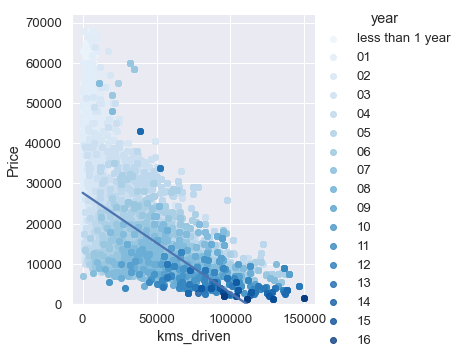

In [75]:
g = sns.lmplot(x="kms_driven", y="Price", hue="year", data=df, palette="Blues", fit_reg=False)
sns.regplot(x="kms_driven", y="Price", data=df, scatter=False, ax=g.axes[0, 0])
g.set(ylim=(-2, None))
g.figure.savefig("linear_regression.png",dpi=300)

# Data encoding
input (x) and the prediction (y)

In [76]:
df_usedcarforML=df[['name','company','year','kms_driven','fuel_type','transmission','Price']]
X=df[['name','company','year','kms_driven','fuel_type','transmission']]
y=df['Price']

####  Type variables

In [77]:
X.dtypes

name            object
company         object
year            object
kms_driven       int64
fuel_type       object
transmission    object
dtype: object

#### Unique values

In [78]:
for col in X:
    print(X[col].unique())

['TOYOTA Yaris-1.5' 'AUDI Q7-3.0' 'AUDI Q5-2.0' 'AUDI S4-3.0'
 'AUDI A4-2.0' 'TOYOTA Prius-1.8' 'TOYOTA RAV4-2.5' 'AUDI Q3-2.0'
 'TOYOTA Corolla-1.8' 'VOLKSWAGEN Passat-2.0' 'VOLKSWAGEN Golf-1.4'
 'VOLKSWAGEN Tiguan-2.0' 'AUDI A3-2.0' 'AUDI A8-3.0' 'TOYOTA C-HR-2.0'
 'FORD EcoSport-1.0' 'AUDI Q8-3.0' 'FORD Mustang-2.3' 'FORD Mustang-5.0'
 'TOYOTA Camry-2.5' 'AUDI Q5-3.0' 'TOYOTA Corolla-2.0' 'FORD Edge-2.0'
 'AUDI S3-2.0' 'AUDI SQ5-3.0' 'FORD Fiesta-1.6' 'VOLKSWAGEN Jetta-1.4'
 'VOLKSWAGEN Beetle-2.0' 'AUDI S8-4.0' 'VOLKSWAGEN CC-2.0' 'AUDI A8-4.0'
 'AUDI A3-1.8' 'AUDI R8-4.2' 'AUDI R8-5.2' 'AUDI S5-3.0']
['TOYOTA' 'AUDI' 'VOLKSWAGEN' 'FORD']
['less than 1 year' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11'
 '12' '13' '14' '15' '16']
[    10   4162   3182 ... 129000 111000 150000]
['Petrol' 'Diesel' 'Hybrid']
['Automatic' 'Semi-Auto' 'Manual']


In [79]:
X['name'].describe()

count           35370
unique             35
top       AUDI A4-2.0
freq             5315
Name: name, dtype: object

#### A one hot encoder and dummy functions were applied to convert categorical features such as fuel type, transmission, name, and company into numeric data (binary values). It needs converting because the computer can understand when the values are numeric data.

In [80]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type','transmission','year']])

OneHotEncoder()

In [81]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type','transmission','year']),
                                    remainder='passthrough')

# Feature importance

#### When estimating the price of used cars, not every feature has the same effect on the price. Therefore, the Pearson correlation can help people to understand factors that affect second-hand prices

In [82]:
dfpearson_heatmap = dfpearson[['year','kms_driven','fuel_type','transmission','Price']]

In [83]:
one_hot_encoded_training_predictors = pd.get_dummies(dfpearson_heatmap)

In [84]:
one_hot_encoded_training_predictors

,year,kms_driven,Price,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Petrol,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
26334,0,10,14990,0,0,1,1,0,0
12340,0,4162,68000,1,0,0,1,0,0
12341,0,3182,53792,1,0,0,1,0,0
6788,0,6000,39990,0,0,1,0,0,1
12503,0,1500,45888,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
25060,16,111000,1250,0,0,1,0,1,0
29475,16,150000,1550,0,0,1,0,1,0
24980,16,96000,2095,0,0,1,0,1,0
25334,16,96000,2095,0,0,1,0,1,0


In [85]:
pearsoncorr=one_hot_encoded_training_predictors.corr(method='pearson')

In [86]:
pearsoncorr

,year,kms_driven,Price,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Petrol,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
year,1.000000,0.765905,-0.622554,0.088249,-0.035624,-0.068341,-0.120035,0.257693,-0.151789
kms_driven,0.765905,1.000000,-0.540316,0.216492,-0.046098,-0.194969,-0.117512,0.234428,-0.129587
Price,-0.622554,-0.540316,1.000000,0.194394,-0.047519,-0.171015,0.230644,-0.511338,0.308899
fuel_type_Diesel,0.088249,0.216492,0.194394,1.000000,-0.378973,-0.790749,-0.084750,-0.022953,0.111071
fuel_type_Hybrid,-0.035624,-0.046098,-0.047519,-0.378973,1.000000,-0.266808,0.479565,-0.280977,-0.190888
fuel_type_Petrol,-0.068341,-0.194969,-0.171015,-0.790749,-0.266808,1.000000,-0.228962,0.209765,0.010596
transmission_Automatic,-0.120035,-0.117512,0.230644,-0.084750,0.479565,-0.228962,1.000000,-0.541576,-0.445255
transmission_Manual,0.257693,0.234428,-0.511338,-0.022953,-0.280977,0.209765,-0.541576,1.000000,-0.511583
transmission_Semi-Auto,-0.151789,-0.129587,0.308899,0.111071,-0.190888,0.010596,-0.445255,-0.511583,1.000000


In [87]:
# new dataframe with different column order
pearsoncorr = pearsoncorr.iloc[:, [0,1,3,4,5,6,7,8,2]]
# display the dataframe
pearsoncorr

,year,kms_driven,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Petrol,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,Price
year,1.000000,0.765905,0.088249,-0.035624,-0.068341,-0.120035,0.257693,-0.151789,-0.622554
kms_driven,0.765905,1.000000,0.216492,-0.046098,-0.194969,-0.117512,0.234428,-0.129587,-0.540316
Price,-0.622554,-0.540316,0.194394,-0.047519,-0.171015,0.230644,-0.511338,0.308899,1.000000
fuel_type_Diesel,0.088249,0.216492,1.000000,-0.378973,-0.790749,-0.084750,-0.022953,0.111071,0.194394
fuel_type_Hybrid,-0.035624,-0.046098,-0.378973,1.000000,-0.266808,0.479565,-0.280977,-0.190888,-0.047519
fuel_type_Petrol,-0.068341,-0.194969,-0.790749,-0.266808,1.000000,-0.228962,0.209765,0.010596,-0.171015
transmission_Automatic,-0.120035,-0.117512,-0.084750,0.479565,-0.228962,1.000000,-0.541576,-0.445255,0.230644
transmission_Manual,0.257693,0.234428,-0.022953,-0.280977,0.209765,-0.541576,1.000000,-0.511583,-0.511338
transmission_Semi-Auto,-0.151789,-0.129587,0.111071,-0.190888,0.010596,-0.445255,-0.511583,1.000000,0.308899


In [88]:
sns.set(font_scale=1.8)

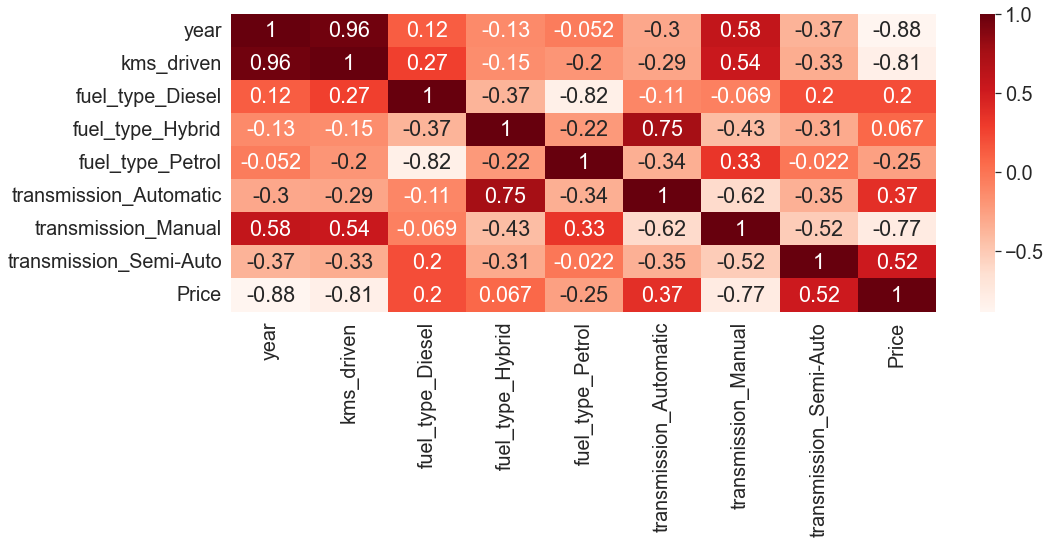

In [89]:
#Using Pearson Correlation
plt.figure(figsize=(16,8))
cor = pearsoncorr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.tight_layout()
plt.savefig("pearsonfig.png")
plt.show()

#  Train and test split

#### It is necessary to test the predictive accuracy of the model. The random values were split 80:20 from the dataset. The purpose is to be able to train the model in a single dataset, but testing in different new data sections

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [91]:
X_train

,name,company,year,kms_driven,fuel_type,transmission
15439,FORD EcoSport-1.0,FORD,03,20962,Petrol,Manual
6888,FORD EcoSport-1.0,FORD,01,2800,Petrol,Manual
33761,AUDI Q7-3.0,AUDI,07,82890,Diesel,Semi-Auto
14197,AUDI Q5-2.0,AUDI,02,8301,Petrol,Semi-Auto
34180,VOLKSWAGEN Golf-1.4,VOLKSWAGEN,07,51148,Petrol,Semi-Auto
...,...,...,...,...,...,...
24222,AUDI Q5-2.0,AUDI,04,41581,Diesel,Semi-Auto
8758,TOYOTA Corolla-1.8,TOYOTA,01,7445,Hybrid,Automatic
27943,AUDI Q3-2.0,AUDI,04,51708,Diesel,Manual
28782,AUDI Q3-2.0,AUDI,04,82970,Diesel,Automatic


In [92]:
X_test

,name,company,year,kms_driven,fuel_type,transmission
28012,AUDI A4-2.0,AUDI,04,49000,Diesel,Manual
1051,AUDI A4-2.0,AUDI,less than 1 year,7456,Petrol,Manual
5061,TOYOTA Yaris-1.5,TOYOTA,01,2847,Petrol,Manual
20561,AUDI Q3-2.0,AUDI,03,29041,Diesel,Manual
13542,AUDI Q5-2.0,AUDI,02,26974,Petrol,Semi-Auto
...,...,...,...,...,...,...
29066,AUDI Q5-3.0,AUDI,05,43819,Diesel,Semi-Auto
30161,AUDI A4-2.0,AUDI,05,69000,Diesel,Manual
16027,FORD EcoSport-1.0,FORD,03,31087,Petrol,Manual
30316,VOLKSWAGEN Tiguan-2.0,VOLKSWAGEN,05,58682,Diesel,Manual


# Linear Regression

In [93]:
lr=LinearRegression()

In [94]:
pipe=make_pipeline(column_trans,lr)

In [95]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['AUDI A3-1.8', 'AUDI A3-2.0', 'AUDI A4-2.0', 'AUDI A8-3.0',
       'AUDI A8-4.0', 'AUDI Q3-2.0', 'AUDI Q5-2.0', 'AUDI Q5-3.0',
       'AUDI Q7-3.0', 'AUDI Q8-3.0', 'AUDI R8-4.2', 'AUDI R8-5.2',
       'AUDI S3-2.0', 'AUDI S4-3.0', 'AUDI S5-3.0', 'AUDI S8-4.0'...
                                                                            array(['AUDI', 'FORD', 'TOYOTA', 'VOLKSWAGEN'], dtype=object),
                                                                            array(['Diesel', 'Hybrid', 'Petrol'], dtype=object),
                                                                            array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object),
                                                                            array(['01

In [96]:
r2_score(y_train, pipe.predict(X_train))*100

92.03018145191105

# Linear Regression accuracy

In [97]:
y_pred=pipe.predict(X_test)

In [98]:
r2=r2_score(y_test,y_pred)*100
print('r_squared:', r2.round(2))

#Mean Squared Error
mse = mean_squared_error(y_test,y_pred)
print('\nMean squared error Testing Set:', round(mse))

#Mean Absolute Error
mae = mean_absolute_error(y_test,y_pred)
print('Mean absolute error Testing Set:', round(mae))

#Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error Testing Set:', round(rmse))


def mean_absolute_percentage_error(y_test, y_pred): 
    y_true, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('means absolute percentage error Testing Set:', round(mean_absolute_percentage_error(y_test, y_pred), 2))

r_squared: 92.47

Mean squared error Testing Set: 8450468
Mean absolute error Testing Set: 2074
Root Mean Squared Error Testing Set: 2907
means absolute percentage error Testing Set: 11.32


In [99]:
sns.set(font_scale=1.3)

Text(0, 0.5, 'Predicted price')

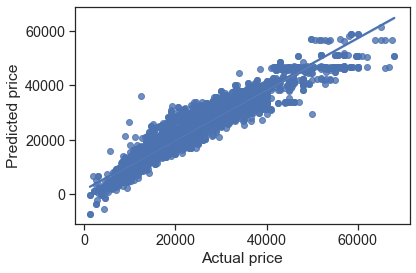

In [100]:
sns.set_style('ticks')
sns.regplot(x=y_test,y=y_pred, fit_reg=True)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

Text(0.5, 0, 'Residual plot')

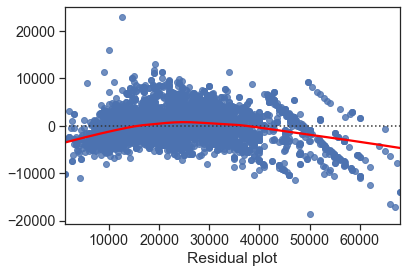

In [101]:
# draw residplot
sns.residplot(x = y_test,
              y = y_pred,lowess=True,line_kws={'color': 'red'})

# show the plot
plt.xlabel('Residual plot')

# XGBoost

In [102]:
xgboost = XGBRegressor()

In [103]:
pipe=make_pipeline(column_trans,xgboost)

In [104]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['AUDI A3-1.8', 'AUDI A3-2.0', 'AUDI A4-2.0', 'AUDI A8-3.0',
       'AUDI A8-4.0', 'AUDI Q3-2.0', 'AUDI Q5-2.0', 'AUDI Q5-3.0',
       'AUDI Q7-3.0', 'AUDI Q8-3.0', 'AUDI R8-4.2', 'AUDI R8-5.2',
       'AUDI S3-2.0', 'AUDI S4-3.0', 'AUDI S5-3.0', 'AUDI S8-4.0'...
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=8, num_parallel_tree=1, predictor='auto',
                              random_state=0, reg_alph

In [105]:
r2_score(y_train, pipe.predict(X_train))*100

97.13075946360559

In [106]:
y_pred=pipe.predict(X_test)

# XGBoost Regression accuracy

In [107]:
r2=r2_score(y_test,y_pred)*100
print('r_squared:', r2.round(2))

#Mean Squared Error
mse = mean_squared_error(y_test,y_pred)
print('\nMean squared error Testing Set:', round(mse))

#Mean Absolute Error
mae = mean_absolute_error(y_test,y_pred)
print('Mean absolute error Testing Set:', round(mae))

#Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error Testing Set:', round(rmse))


def mean_absolute_percentage_error(y_test, y_pred): 
    y_true, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('means absolute percentage error Testing Set:', round(mean_absolute_percentage_error(y_test, y_pred), 2))

r_squared: 96.84

Mean squared error Testing Set: 3542213
Mean absolute error Testing Set: 1329
Root Mean Squared Error Testing Set: 1882
means absolute percentage error Testing Set: 6.59


In [108]:
sns.set(font_scale=1.3)

Text(0, 0.5, 'Predicted price')

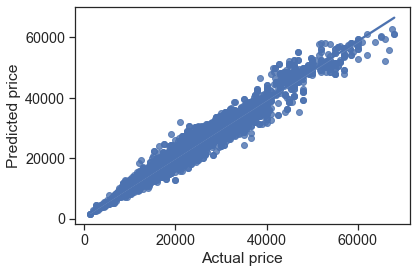

In [109]:
sns.set_style('ticks')
sns.regplot(x=y_test,y=y_pred, fit_reg=True)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

Text(0.5, 0, 'Residual plot')

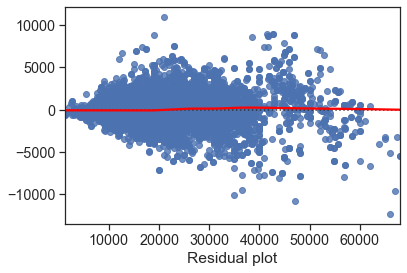

In [110]:
# draw residplot
sns.residplot(x = y_test,
              y = y_pred,lowess=True,line_kws={'color': 'red'})

# show the plot
plt.xlabel('Residual plot')

# Random Forest

In [111]:
rf=RandomForestRegressor()

In [112]:
pipe=make_pipeline(column_trans,rf)

In [113]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['AUDI A3-1.8', 'AUDI A3-2.0', 'AUDI A4-2.0', 'AUDI A8-3.0',
       'AUDI A8-4.0', 'AUDI Q3-2.0', 'AUDI Q5-2.0', 'AUDI Q5-3.0',
       'AUDI Q7-3.0', 'AUDI Q8-3.0', 'AUDI R8-4.2', 'AUDI R8-5.2',
       'AUDI S3-2.0', 'AUDI S4-3.0', 'AUDI S5-3.0', 'AUDI S8-4.0'...
                                                                            array(['AUDI', 'FORD', 'TOYOTA', 'VOLKSWAGEN'], dtype=object),
                                                                            array(['Diesel', 'Hybrid', 'Petrol'], dtype=object),
                                                                            array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object),
                                                                            array(['01

In [114]:
r2_score(y_train, pipe.predict(X_train))*100

99.49391691932611

In [115]:
y_pred=pipe.predict(X_test)

# Random Forest Regression accuracy

In [116]:
r2=r2_score(y_test,y_pred)*100
print('r_squared:', r2.round(2))

#Mean Squared Error
mse = mean_squared_error(y_test,y_pred)
print('\nMean squared error Testing Set:', round(mse))

#Mean Absolute Error
mae = mean_absolute_error(y_test,y_pred)
print('Mean absolute error Testing Set:', round(mae))

#Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error Testing Set:', round(rmse))


def mean_absolute_percentage_error(y_test, y_pred): 
    y_true, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('means absolute percentage error Testing Set:', round(mean_absolute_percentage_error(y_test, y_pred), 2))

r_squared: 99.09

Mean squared error Testing Set: 1020627
Mean absolute error Testing Set: 446
Root Mean Squared Error Testing Set: 1010
means absolute percentage error Testing Set: 2.19


In [117]:
sns.set(font_scale=1.3)

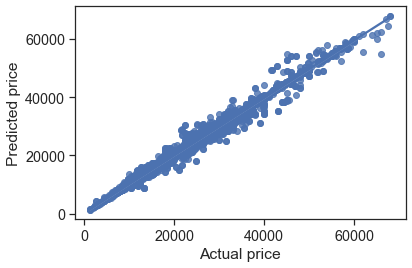

In [118]:
sns.set_style('ticks')
sns.regplot(x=y_test,y=y_pred, fit_reg=True)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.tight_layout()
plt.savefig("predicted_actual.png",dpi=300)
plt.show()

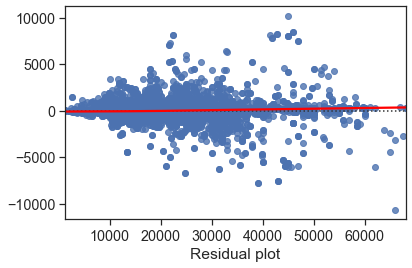

In [119]:
# draw residplot
ax2=sns.residplot(x = y_test,
              y = y_pred,lowess=True,line_kws={'color': 'red'})

# show the plot
plt.xlabel('Residual plot')
plt.tight_layout()
plt.savefig("Residual_plot.png",dpi=300)
plt.show()

### The best algorithm is Random Forest 
because R² Score has the highest value of 99% and the lowest error MSE 1020627, RMSE 446, MAE 1010, and MAPE is 2.19%

# Save Random Forest model and CSV. These will be used onto a website.

In [120]:
pickle.dump(pipe,open('RandomForest.pkl','wb'))

In [121]:
df_usedcarforML.to_csv('UsedcarforML.csv')

#### Since the Random Forest model cannot detect trends in extrapolated values outside the range of the training set , improved accuracy is required before the model is uploaded to the website. 

### The record heat map of the year against mileage (kms_driven) conditioning by price

In [122]:
dfrecord_heatmap = df[['year','kms_driven','Price']]

In [123]:
dfrecord_heatmap

,year,kms_driven,Price
0,less than 1 year,10,14990
1,less than 1 year,4162,68000
2,less than 1 year,3182,53792
3,less than 1 year,6000,39990
4,less than 1 year,1500,45888
...,...,...,...
35365,16,111000,1250
35366,16,150000,1550
35367,16,96000,2095
35368,16,96000,2095


In [124]:
dfrecord_heatmap=dfrecord_heatmap.reset_index()

In [125]:
dfrecord_heatmap.drop(['index'] ,axis=1,inplace=True)

In [126]:
heatmap_data = pd.pivot_table(dfrecord_heatmap, values='Price', index=['year'], columns='kms_driven', sort=False)

In [127]:
heatmap_data

kms_driven,1,2,3,4,5,7,8,9,10,11,...,134540,135800,136000,136764,137000,138649,139989,140000,146604,150000
year,,,,,,,,,,,,,,,,,,,,,
less than 1 year,NaN,14990.0,25990.0,NaN,32496.0,18499.0,NaN,35480.0,37647.603448,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01,26464.333333,NaN,NaN,14719.0,14916.6,18994.0,18495.0,14858.0,34394.551020,32270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7795.0,NaN,NaN,NaN,7493.0,NaN,NaN,7492.0,NaN,NaN
06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='kms_driven', ylabel='year'>

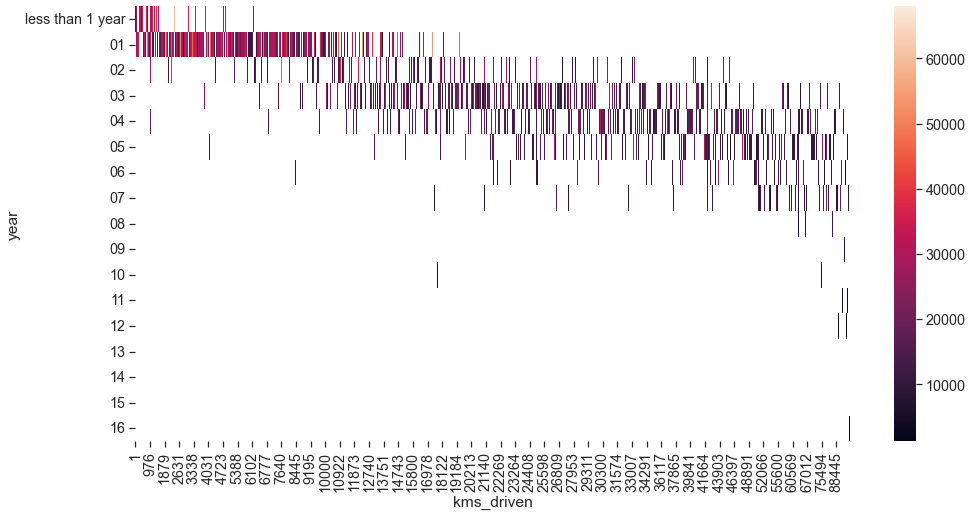

In [128]:
plt.figure(figsize = (16,8))
sns.heatmap(heatmap_data)

### Make the heatmap easier to read by using grouping

In [129]:
def bin(dfrecord_heatmap):

    if (1 <= dfrecord_heatmap['kms_driven'] < 10000 ):
        return 5000
    elif (10000 <= dfrecord_heatmap['kms_driven'] < 20000 ):
        return 15000
    elif (20000 <= dfrecord_heatmap['kms_driven'] < 30000 ):
        return 25000
    elif (30000 <= dfrecord_heatmap['kms_driven'] < 40000 ):
        return 35000
    elif (40000 <= dfrecord_heatmap['kms_driven'] < 50000 ):
        return 45000
    elif (50000 <= dfrecord_heatmap['kms_driven'] < 60000 ):
        return 55000
    elif (60000 <= dfrecord_heatmap['kms_driven'] < 70000 ):
        return 65000
    elif (70000 <= dfrecord_heatmap['kms_driven'] < 80000 ):
        return 75000
    elif (80000 <= dfrecord_heatmap['kms_driven'] < 90000 ):
        return 85000
    elif (90000 <= dfrecord_heatmap['kms_driven'] < 100000 ):
        return 95000
    elif (100000 <= dfrecord_heatmap['kms_driven'] < 110000 ):
        return 105000
    elif (110000 <= dfrecord_heatmap['kms_driven'] < 120000 ):
        return 115000
    elif (120000 <= dfrecord_heatmap['kms_driven'] < 130000 ):
        return 125000
    elif (130000 <= dfrecord_heatmap['kms_driven'] < 140000 ):
        return 135000
    elif (140000 <= dfrecord_heatmap['kms_driven'] <= 150000 ):
        return 145000

dfrecord_heatmap['kms_driven'] = dfrecord_heatmap.apply(bin, axis = 1)

In [130]:
dfrecord_heatmap

,year,kms_driven,Price
0,less than 1 year,5000,14990
1,less than 1 year,5000,68000
2,less than 1 year,5000,53792
3,less than 1 year,5000,39990
4,less than 1 year,5000,45888
...,...,...,...
35365,16,115000,1250
35366,16,145000,1550
35367,16,95000,2095
35368,16,95000,2095


In [131]:
dfrecord_heatmap=dfrecord_heatmap.iloc[::-1]

In [132]:
dfrecord_heatmap

,year,kms_driven,Price
35369,16,145000,1550
35368,16,95000,2095
35367,16,95000,2095
35366,16,145000,1550
35365,16,115000,1250
...,...,...,...
4,less than 1 year,5000,45888
3,less than 1 year,5000,39990
2,less than 1 year,5000,53792
1,less than 1 year,5000,68000


In [133]:
heatmap_data = pd.pivot_table(dfrecord_heatmap, values='Price', index=['year'], columns='kms_driven', sort=False)

In [134]:
heatmap_data

kms_driven,5000,15000,25000,35000,45000,55000,65000,75000,85000,95000,105000,115000,125000,135000,145000
year,,,,,,,,,,,,,,,
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2095.000000,NaN,1250.000000,NaN,NaN,1550.0
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2990.000000,1975.000000,NaN,1300.000000,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2695.000000,3884.444444,3895.000000,4428.333333,2995.000000,1895.000000,NaN,NaN
13,NaN,NaN,NaN,42992.000000,NaN,NaN,NaN,5325.222222,5495.000000,2495.000000,NaN,2250.000000,2817.222222,3237.857143,NaN
12,NaN,NaN,NaN,NaN,NaN,15534.142857,NaN,4380.555556,5849.142857,5400.000000,4399.000000,3515.000000,3995.000000,3550.555556,4495.0
11,NaN,NaN,3995.000000,NaN,5450.000000,6164.375000,8383.272727,3892.000000,5950.000000,5795.000000,4375.000000,5335.000000,3995.000000,6797.000000,NaN
10,NaN,5490.000000,NaN,NaN,6626.666667,8936.714286,7485.500000,6905.714286,9216.200000,7701.250000,4359.166667,7982.142857,NaN,NaN,NaN
09,NaN,NaN,9985.000000,8933.500000,NaN,11149.500000,7983.684211,6898.461538,6154.454545,10707.387097,7147.666667,4991.000000,NaN,6255.000000,NaN
08,NaN,8699.000000,6499.000000,12294.956522,10198.152174,11747.193548,8584.137931,10735.200000,8873.680000,10236.833333,NaN,7695.000000,NaN,NaN,NaN


In [135]:
sns.set(font_scale=1.7)

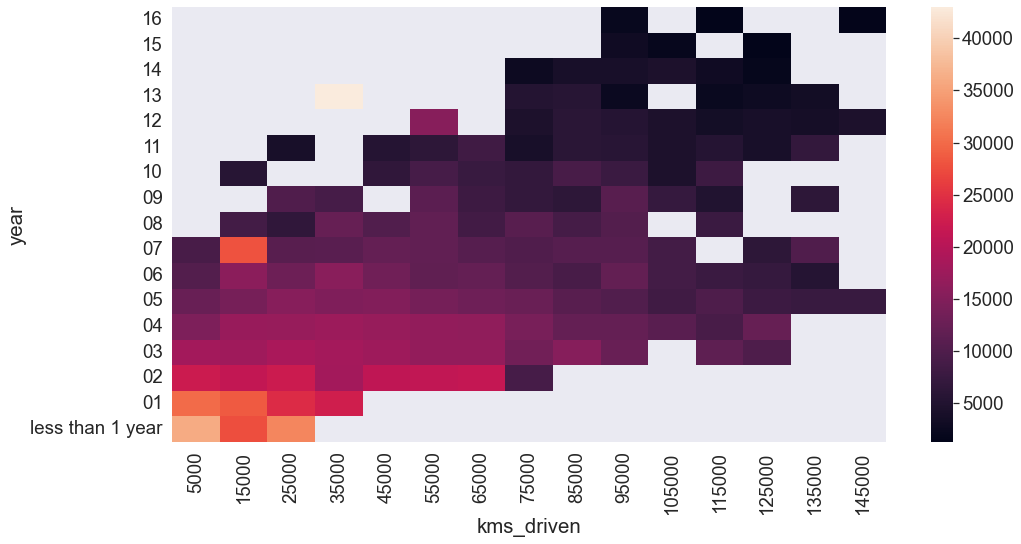

In [136]:
plt.figure(figsize = (16,8))
recordheatmap=sns.heatmap(heatmap_data)
recordheatmap
recordheatmap.figure.savefig("recordheatmap.png",dpi=300)

### The record table of the year against mileage (kms_driven)

In [137]:
df_record = df[df['year'].str.startswith(('l','0','1'))]
df_record

,company,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),name,year,Price,transmission,kms_driven,fuel_type
0,TOYOTA,7.3,5.8,6.6,155,TOYOTA Yaris-1.5,less than 1 year,14990,Automatic,10,Petrol
1,AUDI,13.8,11.4,12.7,296,AUDI Q7-3.0,less than 1 year,68000,Automatic,4162,Diesel
2,AUDI,13.8,11.4,12.7,296,AUDI Q7-3.0,less than 1 year,53792,Automatic,3182,Diesel
3,AUDI,12.0,8.5,10.4,239,AUDI Q5-2.0,less than 1 year,39990,Semi-Auto,6000,Petrol
4,AUDI,13.2,9.2,11.4,262,AUDI S4-3.0,less than 1 year,45888,Automatic,1500,Diesel
...,...,...,...,...,...,...,...,...,...,...,...
35365,TOYOTA,8.5,6.6,7.6,178,TOYOTA Corolla-1.8,16,1250,Manual,111000,Petrol
35366,VOLKSWAGEN,8.1,6.4,7.4,172,VOLKSWAGEN Golf-1.4,16,1550,Manual,150000,Petrol
35367,TOYOTA,8.3,6.7,7.6,178,TOYOTA Corolla-1.8,16,2095,Manual,96000,Petrol
35368,TOYOTA,8.0,6.0,7.1,165,TOYOTA Corolla-1.8,16,2095,Manual,96000,Petrol


In [138]:
df_record=df_record.groupby("year").agg({'kms_driven': ['min', 'max','mean']})
df_record

kms_driven                       
                        min     max           mean
year                                              
01                        1   33033    5967.321976
02                     1000   79032   16743.708360
03                      917  122000   26903.426994
04                     1000  127000   37633.531119
05                     1800  140000   44418.947598
06                       80  134000   48835.992318
07                     7000  131000   54506.375706
08                    15000  113500   67619.295276
09                    25931  139989   80453.534351
10                    17733  113000   77466.482353
11                    29000  136000   85310.584906
12                    52500  146604   95781.298701
13                    39000  138649   99395.078947
14                    78356  126323   98548.451613
15                    95000  129000  109714.285714
16                    96000  150000  116785.714286
less than 1 year          2   22601    2843.248261

In [139]:
df_record=df_record.reset_index(level=0)

In [140]:
df_record=df_record.reindex([16,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
df_record

year kms_driven                       
                            min     max           mean
16  less than 1 year          2   22601    2843.248261
0                 01          1   33033    5967.321976
1                 02       1000   79032   16743.708360
2                 03        917  122000   26903.426994
3                 04       1000  127000   37633.531119
4                 05       1800  140000   44418.947598
5                 06         80  134000   48835.992318
6                 07       7000  131000   54506.375706
7                 08      15000  113500   67619.295276
8                 09      25931  139989   80453.534351
9                 10      17733  113000   77466.482353
10                11      29000  136000   85310.584906
11                12      52500  146604   95781.298701
12                13      39000  138649   99395.078947
13                14      78356  126323   98548.451613
14                15      95000  129000  109714.285714
15                16      96000  150000  116785.714286

In [141]:
df_record.reset_index(drop=True, inplace=True)

In [142]:
df_record= df_record[df_record['year'].str.startswith(('l','0','1'))].round(1)

In [143]:
df_record

year kms_driven                  
                            min     max      mean
0   less than 1 year          2   22601    2843.2
1                 01          1   33033    5967.3
2                 02       1000   79032   16743.7
3                 03        917  122000   26903.4
4                 04       1000  127000   37633.5
5                 05       1800  140000   44418.9
6                 06         80  134000   48836.0
7                 07       7000  131000   54506.4
8                 08      15000  113500   67619.3
9                 09      25931  139989   80453.5
10                10      17733  113000   77466.5
11                11      29000  136000   85310.6
12                12      52500  146604   95781.3
13                13      39000  138649   99395.1
14                14      78356  126323   98548.5
15                15      95000  129000  109714.3
16                16      96000  150000  116785.7

In [144]:
df_record=df_record.set_index('year').T

#### The record table of the year against mileage (kms_driven). The Table has been put on the website so that customers can use it to predict used-car prices and obtain better accuracy.

In [145]:
df_record

year             less than 1 year       01       02        03        04  \
kms_driven min                2.0      1.0   1000.0     917.0    1000.0   
           max            22601.0  33033.0  79032.0  122000.0  127000.0   
           mean            2843.2   5967.3  16743.7   26903.4   37633.5   

year                   05        06        07        08        09        10  \
kms_driven min     1800.0      80.0    7000.0   15000.0   25931.0   17733.0   
           max   140000.0  134000.0  131000.0  113500.0  139989.0  113000.0   
           mean   44418.9   48836.0   54506.4   67619.3   80453.5   77466.5   

year                   11        12        13        14        15        16  
kms_driven min    29000.0   52500.0   39000.0   78356.0   95000.0   96000.0  
           max   136000.0  146604.0  138649.0  126323.0  129000.0  150000.0  
           mean   85310.6   95781.3   99395.1   98548.5  109714.3  116785.7

In [146]:
dfi.export(df_record, "year.png")